-------------------------------------
# **Digital Marketing Campaign Analysis**
-------------------------------------

--------------------
## Context / Scenario
--------------------

You work for a digital marketing agency, and one of your clients runs part of their media on Facebook/Meta. The client has asked you to help them understand their marketing efforts on that platform. Specifically, you've been asked to evlauate their most recent campaign on platform and help make recommendations on how they can improve to drive subsequent results in the future. You decide that a `post campaign analysis` will help you uncover some recommendations for the client.

You've been given the client's campiagn performance data from Facebook. You cam find that data on kaggle, using the link below:

> [Facebook Ad Campaign](https://www.kaggle.com/datasets/madislemsalu/facebook-ad-campaign)

------------------
## Objective
------------------

This dataset contains Ad Campaign data from Facebook; conduct a complete analysis of the dataset, visualize findings, and make recommendations.

For a comprehensive analysis, some of the approaches we will take include, but at not limited to the following:

1. Data Cleaning & Preprocessing:
- Check for missing values.
- Check data types and modify if necessary.
- Analyze the distribution of key metrics.
2. Exploratory Data Analysis (EDA):
- Distribution of ads across campaigns, age groups, and gender.
- Average spend, impressions, clicks, conversions across campaigns.
- Performance metrics across campaigns such as Click Through Rate (CTR), Cost Per Click (CPC), and Conversion Rate.
3. Visualizations:
- Visualize the insights obtained from the EDA.

------------------------------------
## Dataset Description
------------------------------------
The dataset consists of the following columns:

1. `ad_id:` Identifier for the ad.
2. `reporting_start:` Start date for the reporting period.
3. `reporting_end:` End date for the reporting period.
4. `campaign_id:` Identifier for the campaign.
5. `fb_campaign_id:` Identifier for the Facebook campaign.
6. `age:` Age range targeted by the ad.
7. `gender:` Gender targeted by the ad.
8. `interest1, interest2, interest3:` Numerical values representing interests.
9. `impressions:` Number of times the ad was shown.
10. `clicks:` Number of times the ad was clicked.
11. `spent:` Amount of money spent on the ad.
12. `total_conversion:` Number of people who enquired about the product after seeing the ad.
13. `approved_conversion:` Number of people who bought the product after seeing the ad.

---

## Section 1: Install, Import Libraries and Dataset

### Install and Import Libraries

In [275]:
# ! pip install kaggle

In [276]:
#@title Double click to show code cell
import pandas as pd
import numpy as np
import zipfile
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Download Dataset from Kaggle

Let's start with importing the data from kaggle

In [277]:
#@title Double click to show code cell
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Set Up Kaggle Credentials

In [278]:
#@title Double click to show code cell
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [279]:
#@title Double click to show code cell
!cp /content/drive/MyDrive/KaggleToken/kaggle.json ~/.kaggle/kaggle.json

In [280]:
#@title Double click to show code cell
! chmod 600 ~/.kaggle/kaggle.json

### Download Dataset

In [281]:
#@title Double click to show code cell
! kaggle datasets download madislemsalu/facebook-ad-campaign

facebook-ad-campaign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [282]:
#@title Double click to show code cell
zipfile.ZipFile("facebook-ad-campaign.zip", "r").extractall(".")

In [283]:
#@title Double click to show code cell
df = pd.read_csv('data.csv', encoding='latin-1')
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


---

## Section 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) helps in understanding the data better and deriving insights from it. Let's go step by step:

1. `Missing Values:` Check for missing values in the dataset and decide on strategies to handle them.
2. `Summary Statistics:` Obtain a statistical summary of the dataset to understand the central tendencies and spread of the data.
3. `Univariate Analysis:` Analyze the distribution of individual variables.
4. `Bivariate Analysis:` Examine relationships between pairs of variables.
5. `Multivariate Analysis:` Explore relationships among multiple variables.
6. `Outliers Detection:` Identify any potential outliers in the data.

Let's start with Summary Statistics.

In [284]:
df.shape

(1143, 15)

##### **Observations and Insights:**

> The dataset contains **`1143 entries`** and **`15 columns`**.

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

##### **Observations and Insights:**

> The data contains **`objects`**, **`int`**, and **`float`** types, and look all good, so we don't need the convert at this time.

#### Find Missing Values

Next, let's check for Missing Values.

In [286]:
# Check for missing values in the dataset
df.isnull().sum()

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

The dataset has missing values in the following columns:

- total_conversion: 382 missing values
- approved_conversion: 382 missing values

Given the context, these missing values might imply that there were no conversions (either total or approved) for those specific ads, or the data was simply not recorded. We have a few strategies to handle missing values:

1. `Imputation:` Fill in missing values using the mean, median, mode, or a constant (like 0).
2. `Deletion:` Remove rows with missing values.
3. `Predictive Models:` Use machine learning algorithms to predict and fill missing values.
4. `Leave as-is:` If the analysis can accommodate missing values, we might choose to leave them as-is.

For the purpose of this EDA, I'll drop all rows with missing values, under the assumption that there was an error in data collection.

In [287]:
# Drop rows with missing values
df = df.dropna()

In [288]:
# Check for missing values in the dataset
df.isnull().sum()

ad_id                  0
reporting_start        0
reporting_end          0
campaign_id            0
fb_campaign_id         0
age                    0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

In [289]:
df.shape

(761, 15)

Now, let's inspect the dataset to ensure we removed the problematic rows. I decided to do this manually this time. We will save the dataset, download it, and see if we romoved the rows I'm concerned about.

In [290]:
# # Save the processed dataset to a CSV file
# df.to_csv('processed_data.csv', index=False)

In [291]:
# files.download('processed_data.csv')

Upon insepction, i can confirm that the rows in questions were removed. So we're good to go.

##### **Observations and Insights:**

> After dropping rows with missing values, the cleaned dataset now has 761 entries and 15 columns.

#### Descriptive Statistics

1. Descriptive Statistics: Basic statistics for each column to understand the data's central tendency, dispersion, and shape.
2. Visualizations:
- Histograms: To understand the distribution of numerical columns.
- Bar plots: To visualize the distribution of categorical columns.
- Correlation heatmap: To see the relationship between numerical columns.
- Scatter plots: To visualize relationships between two numerical columns.
3. Analyze unique values: For columns like campaign_id, fb_campaign_id, age, and gender to understand the variety and distribution of data.

In [292]:
# Obtain summary statistics of the dataset
df.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,7.610000e+02,761.000000,761.000000,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000
mean,8.956389e+05,25.473062,28.977661,28.984231,1.031716e+05,15.340342,25.782181,2.161629,0.768725
std,1.670937e+05,15.508898,15.607548,15.604816,2.462644e+05,32.715738,57.622334,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000,3.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.480860e+05,16.000000,19.000000,19.000000,3.149000e+03,0.000000,0.000000,1.000000,0.000000
50%,7.811750e+05,22.000000,26.000000,25.000000,1.219300e+04,3.000000,3.580000,1.000000,0.000000
75%,1.121184e+06,29.000000,33.000000,33.000000,8.597000e+04,14.000000,23.210000,2.000000,1.000000
max,1.121593e+06,66.000000,72.000000,72.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


In [293]:
# describe the categorical data
df.describe(include=object)

,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender
count,761,761,761,761,761,761
unique,14,14,3,488,4,2
top,23/08/2017,23/08/2017,936,144611,30-34,M
freq,85,85,464,6,327,486


##### **Observations and Insights:**

1. Numerical Variables:
- **ad_id, campaign_id, fb_campaign_id:** These are identifier columns, so general statistics might not be very informative for them.
- **interest1, interest2, interest3:** These columns have values ranging from 2 to 72, representing different interest categories.
- **impressions:** The number of times the ad was displayed varies widely, ranging from 87 to over 3 million.
- **clicks:** The number of clicks has a range from 0 to 340.
- **spent:** The amount spent on ads ranges from $0 to approximately $640.
- **total_conversion:** The number of conversions ranges from 0 to 60.
- **approved_conversion:** The number of approved conversions ranges from 0 to 21.

2. Categorical Variables:
- reporting_start & reporting_end: There are 14 unique dates. The most frequent date is 18/08/2017.
- campaign_id: Has 3 unique values.
- fb_campaign_id: Has 488 unique values.
- age: The dataset has 4 unique age categories, with "30-34" being the most frequent.
- gender: The dataset has 2 unique values.

Next, let's move on to **`Univariate Analysis`**. We'll visualize the distribution of individual variables to get a better understanding of their characteristics.

#### Univariate Analysis

In [294]:
#@title Double click to show code cell
# Distribution of Numeric Variables
numeric_vars = ['interest1', 'interest2', 'interest3', 'impressions', 'clicks', 'spent', 'total_conversion', 'approved_conversion']
numeric_distributions = df[numeric_vars].describe()

# Count Distribution for Categorical Variables
categorical_vars = ['age', 'gender']
categorical_distributions = df[categorical_vars].apply(lambda x: x.value_counts()).T

numeric_distributions, categorical_distributions

(        interest1   interest2   interest3   impressions      clicks  \
 count  761.000000  761.000000  761.000000  7.610000e+02  761.000000   
 mean    25.473062   28.977661   28.984231  1.031716e+05   15.340342   
 std     15.508898   15.607548   15.604816  2.462644e+05   32.715738   
 min      2.000000    3.000000    3.000000  8.700000e+01    0.000000   
 25%     16.000000   19.000000   19.000000  3.149000e+03    0.000000   
 50%     22.000000   26.000000   25.000000  1.219300e+04    3.000000   
 75%     29.000000   33.000000   33.000000  8.597000e+04   14.000000   
 max     66.000000   72.000000   72.000000  3.052003e+06  340.000000   
 
             spent  total_conversion  approved_conversion  
 count  761.000000        761.000000           761.000000  
 mean    25.782181          2.161629             0.768725  
 std     57.622334          4.062201             1.656445  
 min      0.000000          0.000000             0.000000  
 25%      0.000000          1.000000             0

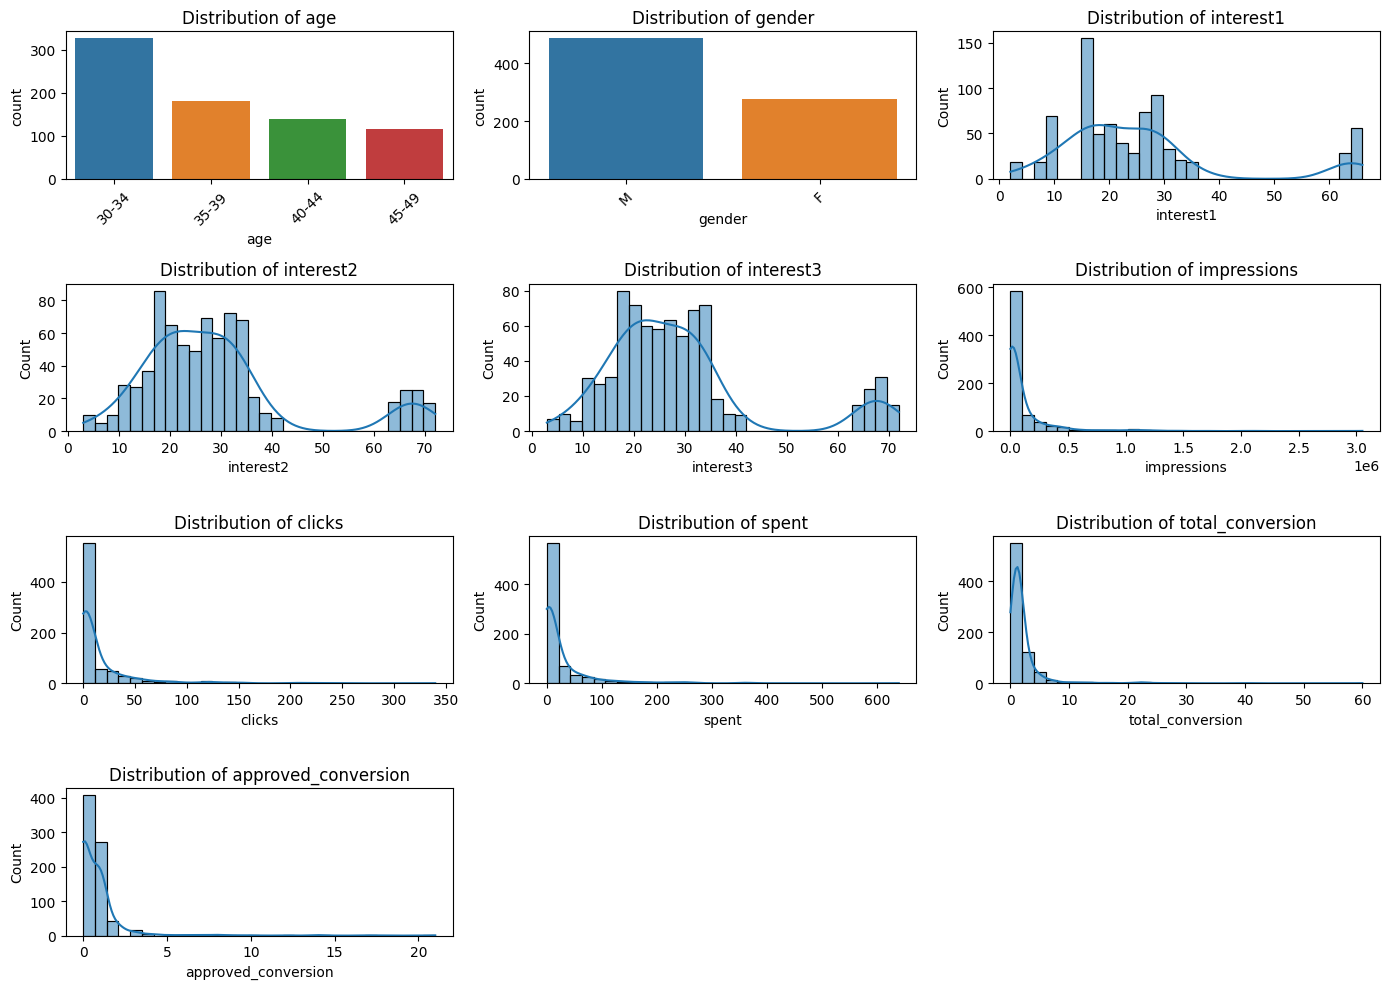

In [295]:
#@title Double click to show code cell
# Set up the figure size
plt.figure(figsize=(14, 10))

# List of columns for univariate analysis
columns = ['age', 'gender', 'interest1', 'interest2', 'interest3', 'impressions', 'clicks', 'spent', 'total_conversion', 'approved_conversion']

# Plotting univariate distributions
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    if df[column].dtype == 'O':  # If the column is categorical
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.xticks(rotation=45)
    else:  # If the column is numerical
        sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

##### **Observations and Insights:**

1. Numeric Variables:
- interest1, interest2, interest3: These variables represent some kind of interests. Their values are mostly distributed between 2 and 72. The means for these interests are approximately 25-29.
- impressions: The number of times the ad was shown. It has a wide range, from a minimum of 87 to a maximum of over 3 million. The average is around 103,171.
- clicks: The number of times the ad was clicked varies from 0 to 340, with an average of around 15.
- spent: The expenditure on ads also shows a broad range from 0 to nearly 640, with an average spend of around 25.78.
- total_conversion: The total conversions vary between 0 to 60, with a median value of 1.
- approved_conversion: The approved conversions range from 0 to 21, with a median of 0.
2. Categorical Variables:
- age: The most targeted age group is '30-34' with 327 occurrences, followed by '35-39', '40-44', and '45-49'.
- gender: The dataset contains more ads targeted towards males (486) than females (275).

Next, let's move on to **`Bivariate Analysis`**. We'll analyze the relationships between pairs of variables to understand how one variable might affect another.

#### Bivariate Analysis

In [296]:
#@title Double click to show code cell
# Correlation Matrix for Numeric Variables
correlation_matrix = df[numeric_vars].corr()
correlation_matrix

,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
interest1,1.000000,0.993594,0.994256,-0.074681,-0.071820,-0.072188,-0.077155,-0.057761
interest2,0.993594,1.000000,0.988009,-0.071790,-0.068672,-0.069274,-0.075735,-0.054047
interest3,0.994256,0.988009,1.000000,-0.070391,-0.067944,-0.068379,-0.073855,-0.055626
impressions,-0.074681,-0.071790,-0.070391,1.000000,0.970509,0.980036,0.885863,0.761856
clicks,-0.071820,-0.068672,-0.067944,0.970509,1.000000,0.997355,0.808487,0.673458
spent,-0.072188,-0.069274,-0.068379,0.980036,0.997355,1.000000,0.825692,0.687713
total_conversion,-0.077155,-0.075735,-0.073855,0.885863,0.808487,0.825692,1.000000,0.881020
approved_conversion,-0.057761,-0.054047,-0.055626,0.761856,0.673458,0.687713,0.881020,1.000000


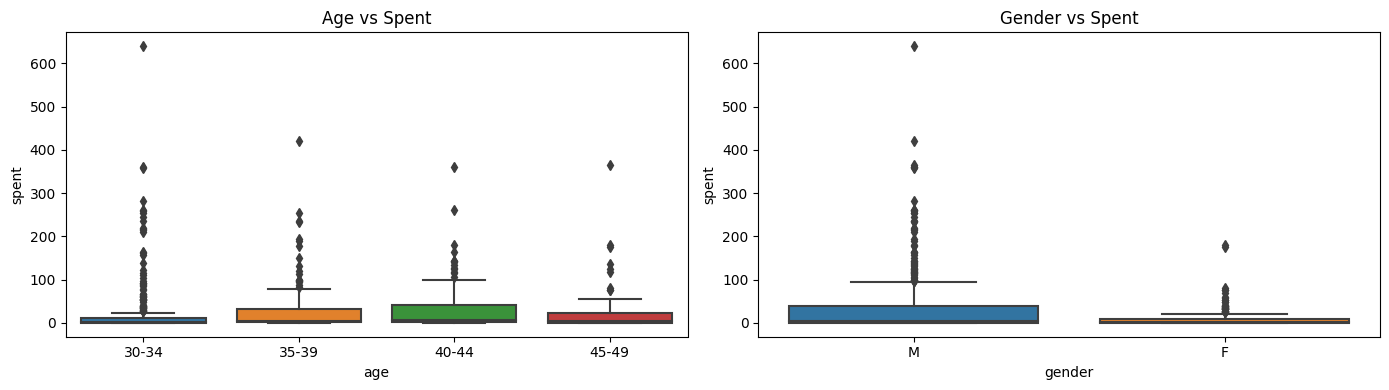

In [297]:
#@title Double click to show code cell
# Impact of Categorical Variables on Numeric Variables
plt.figure(figsize=(14, 4))

# Age vs Spent
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='age', y='spent')
plt.title('Age vs Spent')

# Gender vs Spent
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='gender', y='spent')
plt.title('Gender vs Spent')

plt.tight_layout()
plt.show()

##### **Observations and Insights:**

Correlation between Numeric Variables:

The correlation matrix shows the relationship between different numeric variables:

- interest1, interest2, interest3: These are highly correlated with each other, showing values close to 1. This indicates that they possibly represent closely related types of interests.
- impressions, clicks, and spent: These variables are highly positively correlated. This makes sense as the more you spend, the more impressions you get, and the more clicks you receive.
- total_conversion and approved_conversion: These two are also positively correlated, which means the higher the total conversions, the higher the approved conversions tend to be.

Impact of Categorical Variables on Numeric Variables:
From the box plots:

- Age vs Spent: The expenditure ('spent') seems to be relatively consistent across different age groups, although the 30-34 age group has some outliers which indicate higher spending in some cases.
- Gender vs Spent: The expenditure seems to be slightly higher for ads targeted towards males than females.

Next steps would be to check for Missing Values and Outliers. Would you like to continue with that?

#### Outliers Detection

In [298]:
#@title Double click to show code cell
# Checking for Outliers using IQR method
outliers = {}
for col in numeric_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

outliers

{'interest1': 85,
 'interest2': 85,
 'interest3': 85,
 'impressions': 104,
 'clicks': 99,
 'spent': 103,
 'total_conversion': 87,
 'approved_conversion': 37}

##### **Observations and Insights:**

Using the Interquartile Range (IQR) method, we've identified potential outliers in the numeric variables:

- interest1, interest2, interest3: Each of these variables has 85 potential outliers.
- impressions: 104 potential outliers.
- clicks: 99 potential outliers.
- spent: 103 potential outliers.
- total_conversion: 87 potential outliers.
- approved_conversion: 37 potential outliers.

Do note that these are potential outliers based on the IQR method. In real-world datasets, it's essential to understand the business context before deciding to treat or remove outliers. They could represent genuine extreme values that are of interest.

Would you like to visualize these outliers using box plots or proceed with another analysis?

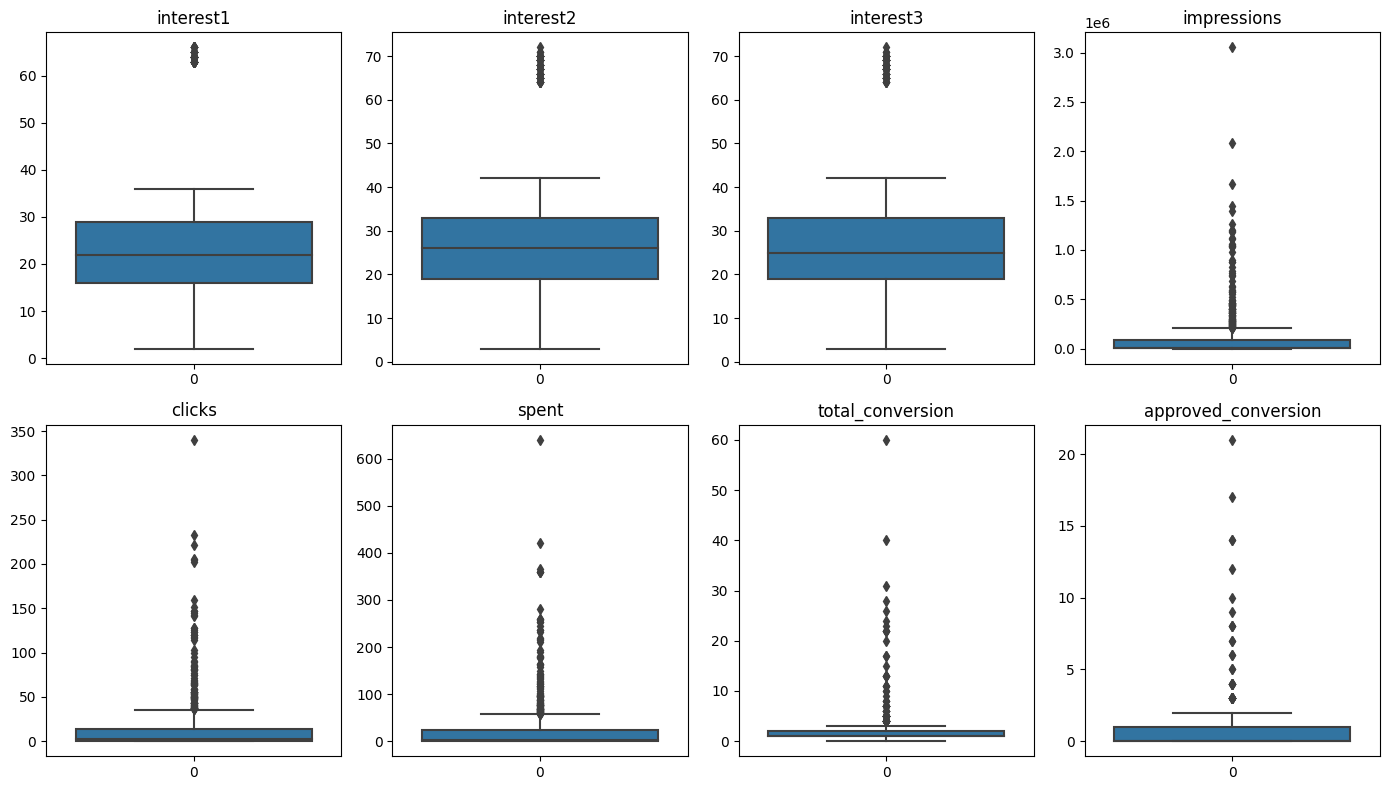

In [299]:
#@title Double click to show code cell
# Visualizing outliers using box plots

plt.figure(figsize=(14, 8))

for index, col in enumerate(numeric_vars, 1):
    plt.subplot(2, 4, index)
    sns.boxplot(df[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

##### **Observations and Insights:**

The box plots visually represent the distribution of data and potential outliers for each numeric variable:

- interest1, interest2, interest3: These plots show some high-interest values as outliers.
- impressions: There are some ads with exceptionally high impressions which are considered outliers.
- clicks: A few ads have a significantly high number of clicks compared to others.
- spent: Similar to clicks, some ads have a much higher expenditure.
- total_conversion: Most conversions are clustered towards the lower range, but there are some ads with high conversions.
- approved_conversion: The majority of approved conversions are at the lower end, with a few ads having much higher approved conversions.

These outliers can be genuine extreme values or anomalies, depending on the context. Before making decisions based on these values, it's essential to understand the business context or consult domain experts.

#### Multivariate analysis

Multivariate analysis helps in understanding interactions between multiple variables at once. In the context of this dataset, we can explore:

1. Pairwise Relationship: Using pair plots to visualize relationships between selected numeric variables.
2. Impact of Categorical Variables: Investigate how age and gender together impact other variables.
3. Correlation Heatmap: A visual representation of the correlation matrix to understand how variables are related.

Let's start with the Pairwise Relationship among a subset of numeric variables to make visualization more interpretable. We'll focus on 'impressions', 'clicks', 'spent', 'total_conversion', and 'approved_conversion'.

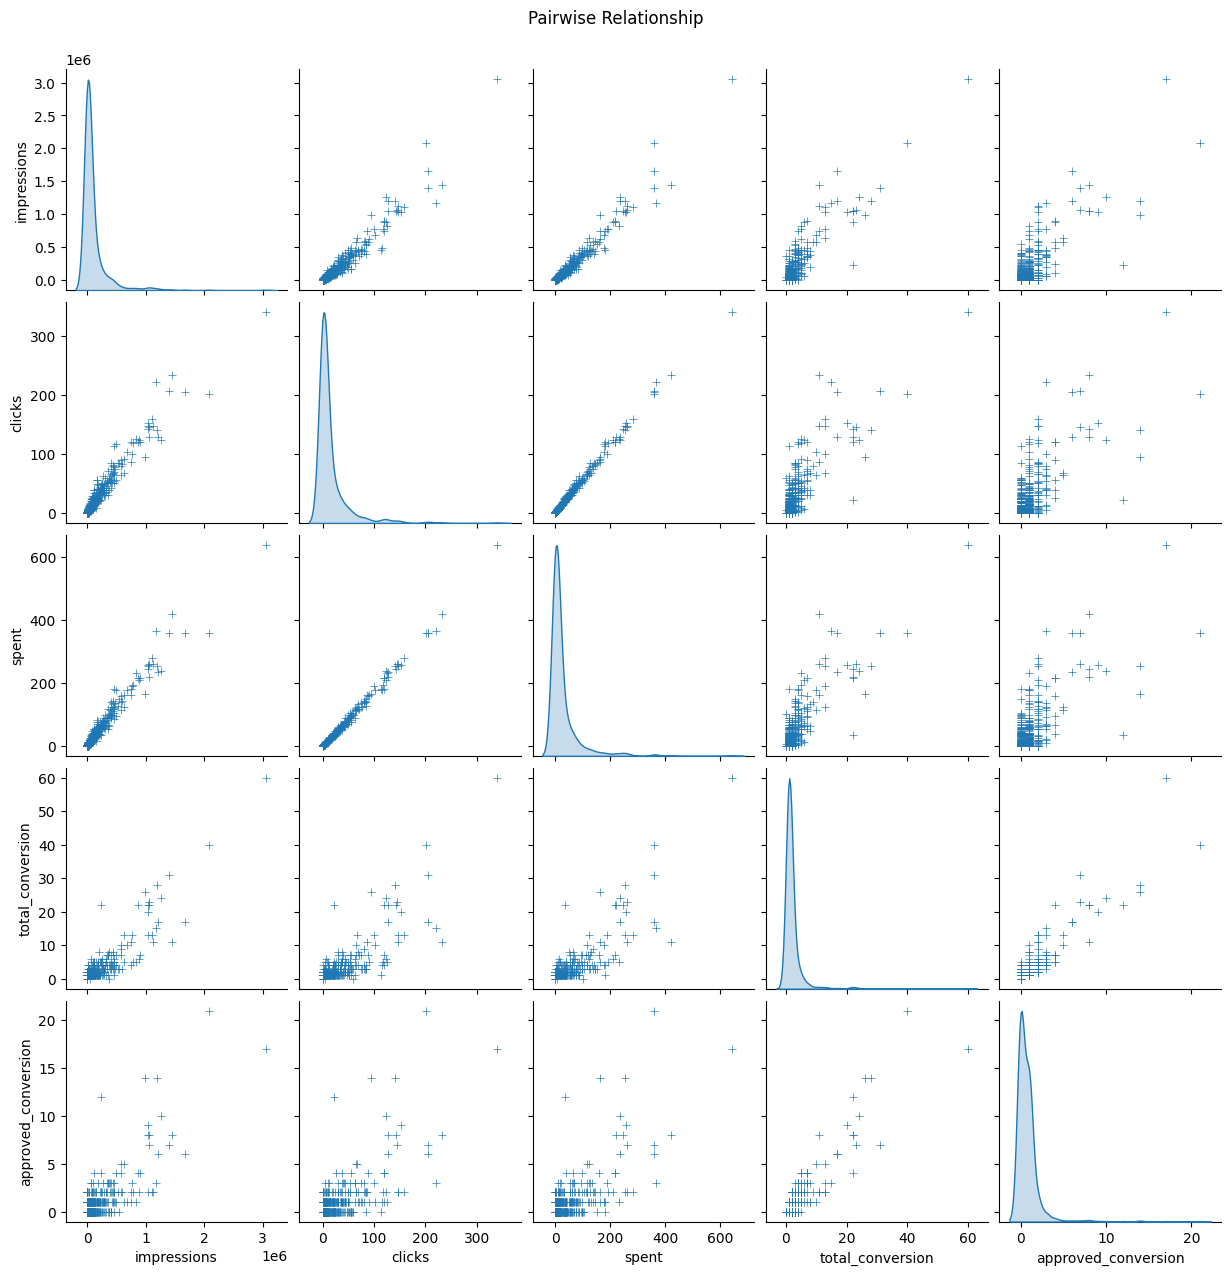

In [300]:
#@title Double click to show code cell
# Pairwise Relationship among selected variables
selected_vars = ['impressions', 'clicks', 'spent', 'total_conversion', 'approved_conversion']
pair_plot = sns.pairplot(df[selected_vars], kind="scatter", diag_kind="kde", markers="+")
pair_plot.fig.suptitle('Pairwise Relationship', y=1.02)
plt.show()

##### **Observations and Insights:**

The pair plots provide a visual representation of pairwise relationships among the selected variables:

- Diagonal plots: Kernel density estimates give an idea about the distribution of individual variables.
- Off-diagonal plots: Scatter plots depict the relationship between two variables.
Observations:

1. Impressions vs. Clicks: There's a positive correlation, which means as the number of impressions increases, the clicks also tend to increase.
2. Impressions vs. Spent: A positive correlation is evident here as well. More impressions usually mean more spending.
3. Clicks vs. Spent: As expected, more clicks are correlated with more spending.
4. Total Conversion: This variable has positive relationships with impressions, clicks, and spent. However, there are several data points where despite high impressions/clicks/spending, the conversions are not as high.
5. Approved Conversion: Similar observations as 'total_conversion', but the approved conversions are generally lower.

Next, we'll explore the **Impact of Categorical Variables**. We'll check how 'age' and 'gender' together impact 'spent', 'total_conversion', and 'approved_conversion'.

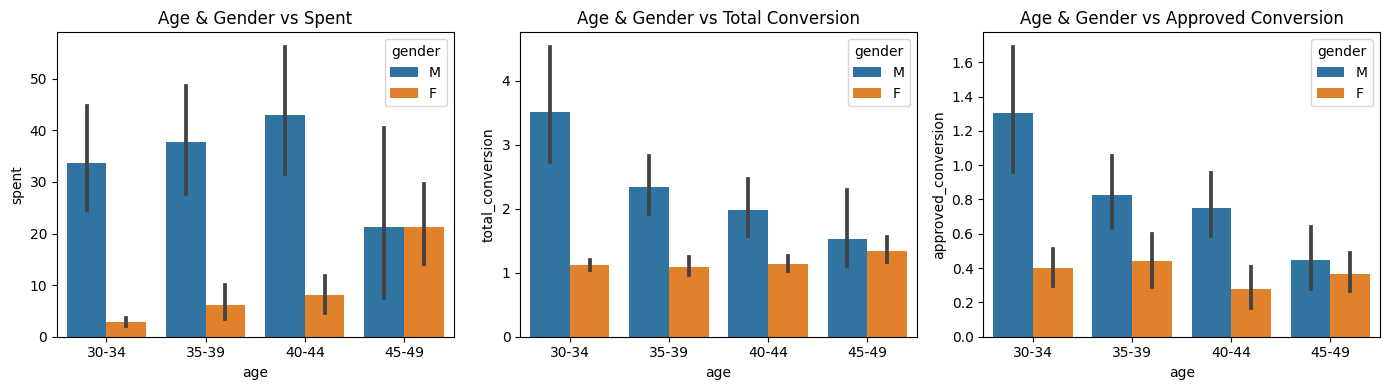

In [301]:
#@title Double click to show code cell
# Impact of Categorical Variables on 'spent', 'total_conversion', and 'approved_conversion'
plt.figure(figsize=(14, 4))

# Age & Gender vs Spent
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='age', y='spent', hue='gender')
plt.title('Age & Gender vs Spent')

# Age & Gender vs Total Conversion
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='age', y='total_conversion', hue='gender')
plt.title('Age & Gender vs Total Conversion')

# Age & Gender vs Approved Conversion
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='age', y='approved_conversion', hue='gender')
plt.title('Age & Gender vs Approved Conversion')

plt.tight_layout()
plt.show()

##### **Observations and Insights:**

The bar plots depict how 'age' and 'gender' together impact 'spent', 'total_conversion', and 'approved_conversion':

1. Age & Gender vs Spent:
- For most age groups, it seems that more is spent on ads targeted towards males than females.
- The age group '30-34' tends to have the highest expenditure, especially for males.
2. Age & Gender vs Total Conversion:
- The age groups '30-34' and '35-39' tend to have the highest total conversions, especially for males.
- Interestingly, the difference in conversions between males and females narrows down in the '45-49' age group.
3. Age & Gender vs Approved Conversion:
- The trends are somewhat similar to total conversions. The age group '30-34' has the highest approved conversions for both genders.
- Again, the difference between genders narrows down for the '45-49' age group.
Lastly, let's visualize the Correlation Heatmap for a clearer understanding of how the numeric variables are related.

Lastly, let's visualize the **Correlation Heatmap** for a clearer understanding of how the numeric variables are related.

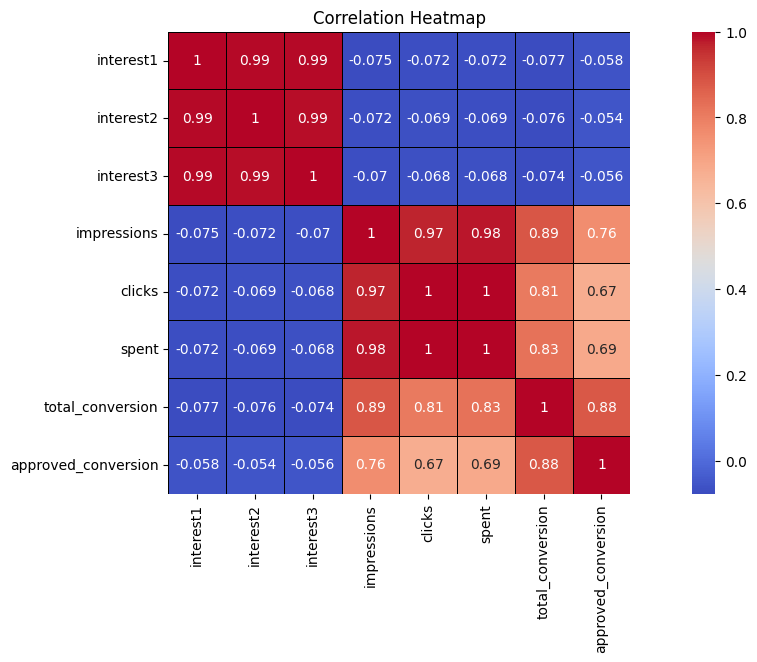

In [302]:
#@title Double click to show code cell
# Correlation Heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

##### **Observations and Insights:**

The correlation heatmap offers a visual representation of the relationships between numeric variables:

- Darker Red Shades: Indicate strong positive correlations. For example, 'clicks' and 'spent' have a correlation close to 1, meaning they're strongly positively correlated.
- Darker Blue Shades: Indicate strong negative correlations. However, in this heatmap, there aren't any strong negative correlations.
- Lighter Shades: Indicate weaker correlations.

**Key Takeaways:**

- 'Impressions', 'clicks', and 'spent' are all strongly correlated, which is expected. The more you spend, the more impressions you get, and more clicks you receive.
- Both 'total_conversion' and 'approved_conversion' are moderately correlated with 'impressions', 'clicks', and 'spent'.
- The 'interest' variables are highly correlated with each other, suggesting they might represent related types of interests.

---

## Section 3: Campaign Performance Analysis

Let's conduct a deeper analysis focusing on the campaign_id variable:

1. Campaign Overview:
- Total number of ads per campaign.
- Average expenditure (spent) per campaign.
2. Campaign Engagement:
- Average impressions and clicks per campaign.
3. Campaign Conversions:
- Average total_conversion and approved_conversion per campaign.
4. Demographic Insights:
- Breakdown of age groups and gender for each campaign.
5. Interest Analysis:
- Average values of interest1, interest2, and interest3 per campaign.
Let's begin with the Campaign Overview.

#### Campaign Overview

In [303]:
#@title Double click to show code cell
# Calculate the new columns
df['cost_per_click'] = df['spent'] / df['clicks']
df['CTR'] = (df['clicks'] / df['impressions']) * 100
df['CPM'] = (df['spent'] / df['impressions']) * 1000

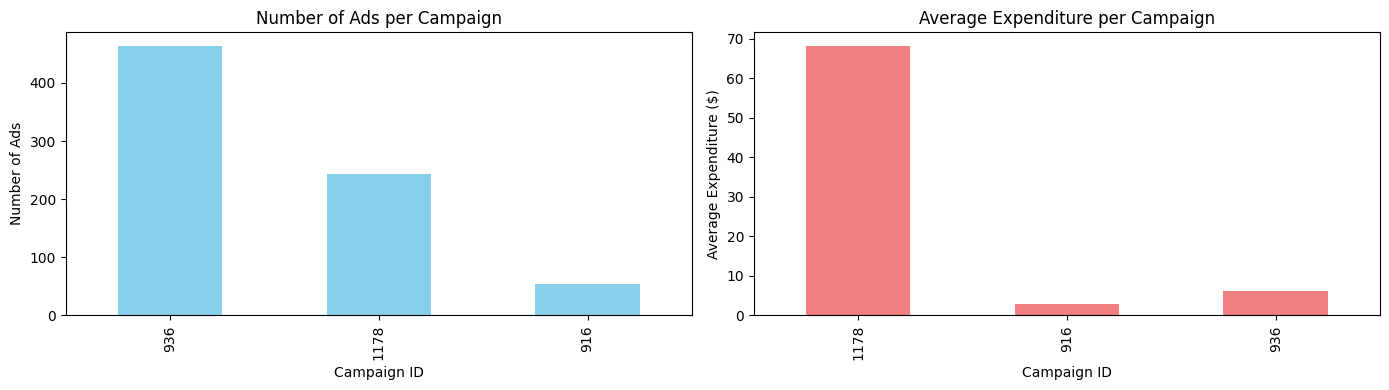

In [304]:
#@title Double click to show code cell
# Total number of ads per campaign
ads_per_campaign = df['campaign_id'].value_counts()

# Average expenditure per campaign
avg_spent_per_campaign = df.groupby('campaign_id')['spent'].mean()

plt.figure(figsize=(14, 4))

# Total number of ads per campaign
plt.subplot(1, 2, 1)
ads_per_campaign.plot(kind='bar', color='skyblue')
plt.title('Number of Ads per Campaign')
plt.ylabel('Number of Ads')
plt.xlabel('Campaign ID')

# Average expenditure per campaign
plt.subplot(1, 2, 2)
avg_spent_per_campaign.plot(kind='bar', color='lightcoral')
plt.title('Average Expenditure per Campaign')
plt.ylabel('Average Expenditure ($)')
plt.xlabel('Campaign ID')

plt.tight_layout()
plt.show()

##### **Observations and Insights:**

Here's an overview of the campaigns:

1. **`Number of Ads per Campaign:`**
- The number of ads varies considerably across different campaigns. Some campaigns have a high number of ads, while others have fewer.

2. **`Average Expenditure per Campaign:`**
- The average expenditure (`spent`) also varies across campaigns. Some campaigns have higher average spending than others, which might not necessarily correlate with the number of ads in that campaign.

Next, let's dive into **`Campaign Engagement`** to understand the average `impressions` and `clicks` per campaign.

#### Campaign Engagement

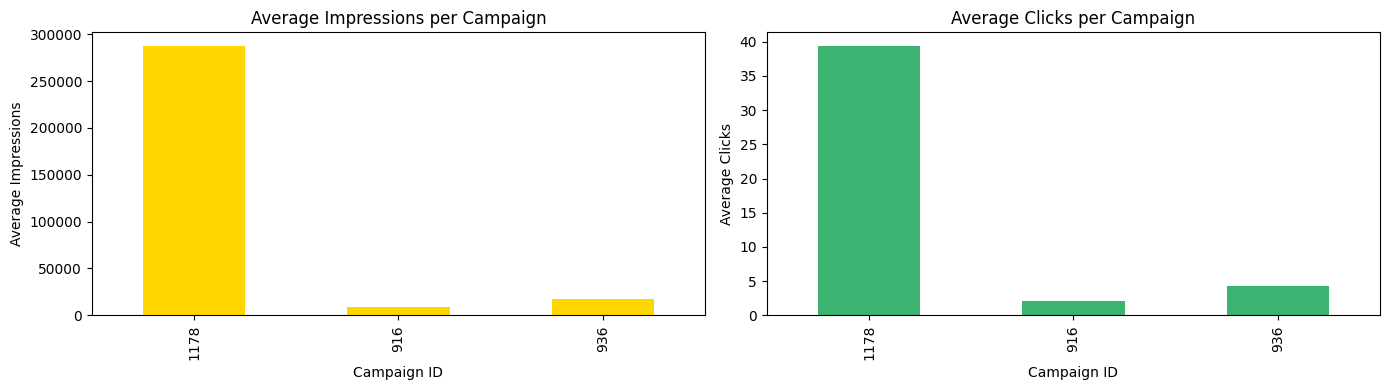

In [305]:
#@title Double click to show code cell
# Average impressions and clicks per campaign
avg_impressions_per_campaign = df.groupby('campaign_id')['impressions'].mean()
avg_clicks_per_campaign = df.groupby('campaign_id')['clicks'].mean()

plt.figure(figsize=(14, 4))

# Average impressions per campaign
plt.subplot(1, 2, 1)
avg_impressions_per_campaign.plot(kind='bar', color='gold')
plt.title('Average Impressions per Campaign')
plt.ylabel('Average Impressions')
plt.xlabel('Campaign ID')

# Average clicks per campaign
plt.subplot(1, 2, 2)
avg_clicks_per_campaign.plot(kind='bar', color='mediumseagreen')
plt.title('Average Clicks per Campaign')
plt.ylabel('Average Clicks')
plt.xlabel('Campaign ID')

plt.tight_layout()
plt.show()

##### **Observations and Insights:**

Here's the engagement analysis for the campaigns:

1. **`Average Impressions per Campaign:`**
- There's significant variation in the average impressions across campaigns. Some campaigns seem to have a much higher reach compared to others.

2. **`Average Clicks per Campaign:`**
- Similarly, the average number of clicks varies across campaigns. Some campaigns, despite having fewer impressions, seem to have a comparatively higher number of clicks, suggesting better engagement or more appealing ad content.

Moving forward, let's analyze **`Campaign Conversions`** by looking at the average `total_conversion` and `approved_conversion` per campaign.

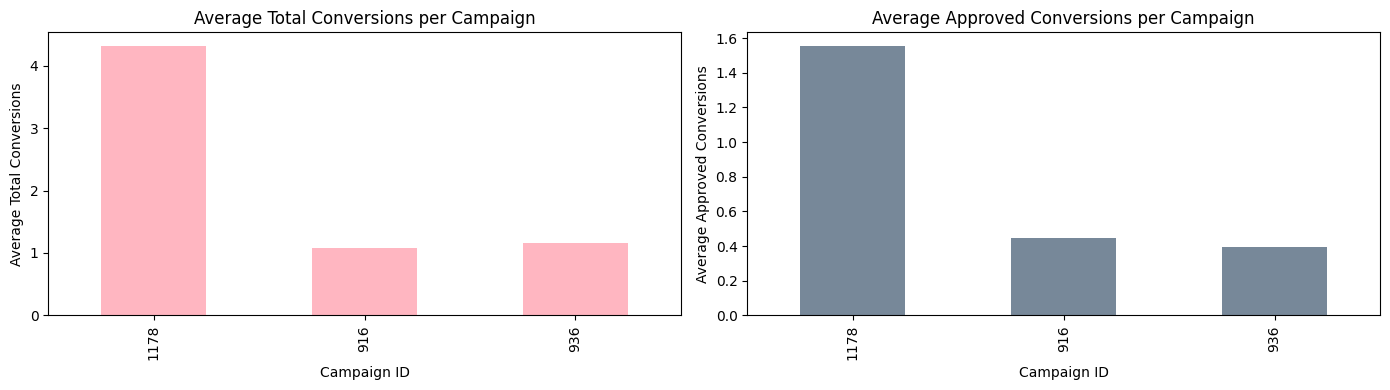

In [306]:
#@title Double click to show code cell
# Average total_conversion and approved_conversion per campaign
avg_total_conversion_per_campaign = df.groupby('campaign_id')['total_conversion'].mean()
avg_approved_conversion_per_campaign = df.groupby('campaign_id')['approved_conversion'].mean()

plt.figure(figsize=(14, 4))

# Average total_conversion per campaign
plt.subplot(1, 2, 1)
avg_total_conversion_per_campaign.plot(kind='bar', color='lightpink')
plt.title('Average Total Conversions per Campaign')
plt.ylabel('Average Total Conversions')
plt.xlabel('Campaign ID')

# Average approved_conversion per campaign
plt.subplot(1, 2, 2)
avg_approved_conversion_per_campaign.plot(kind='bar', color='lightslategray')
plt.title('Average Approved Conversions per Campaign')
plt.ylabel('Average Approved Conversions')
plt.xlabel('Campaign ID')

plt.tight_layout()
plt.show()

##### **Observations and Insights:**

Here's the conversion analysis for the campaigns:

1. **`Average Total Conversions per Campaign:`**
- The average total conversions vary across campaigns. Some campaigns show a higher rate of conversions, which could be due to the nature of the ad, the targeted audience, or other factors.
2. **`Average Approved Conversions per Campaign:`**
- The average approved conversions also show variation across campaigns. Interestingly, the patterns between total conversions and approved conversions are somewhat similar, but not entirely consistent across all campaigns. This suggests that while some campaigns might generate interest, they may not always lead to final conversions.

Next, let's gain some **`Demographic Insights`** by understanding the breakdown of age groups and gender for each campaign.

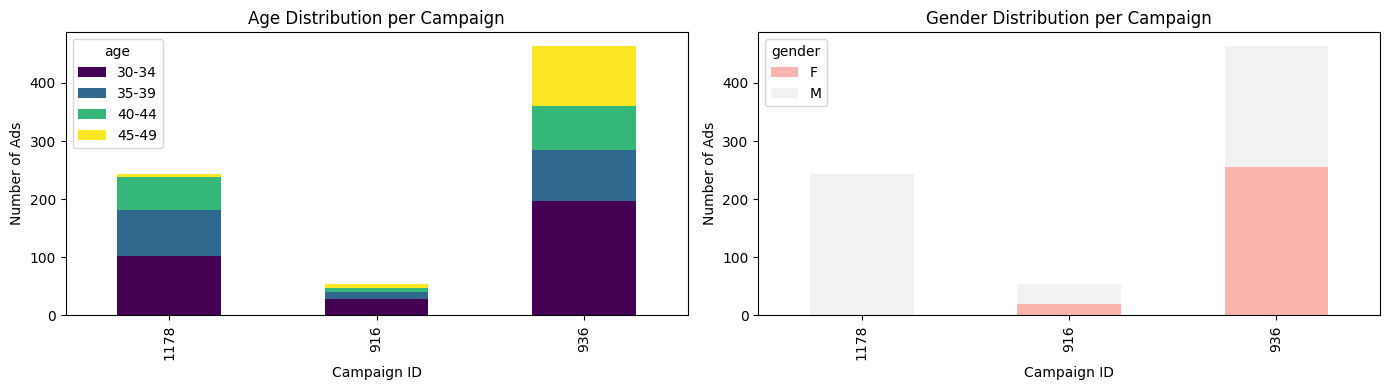

In [307]:
#@title Double click to show code cell
# Breakdown of age groups and gender for each campaign
age_campaign_count = df.groupby(['campaign_id', 'age'])['ad_id'].count().unstack().fillna(0)
gender_campaign_count = df.groupby(['campaign_id', 'gender'])['ad_id'].count().unstack().fillna(0)

plt.figure(figsize=(14, 4))

# Age distribution per campaign
plt.subplot(1, 2, 1)
age_campaign_count.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Age Distribution per Campaign')
plt.ylabel('Number of Ads')
plt.xlabel('Campaign ID')

# Gender distribution per campaign
plt.subplot(1, 2, 2)
gender_campaign_count.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Pastel1')
plt.title('Gender Distribution per Campaign')
plt.ylabel('Number of Ads')
plt.xlabel('Campaign ID')

plt.tight_layout()
plt.show()

##### **Observations and Insights:**

Here are the demographic insights for the campaigns:

1. **`Age Distribution per Campaign:`**
- Different campaigns have varied focus on age groups. Some campaigns target a specific age group more than others, while some have a more balanced distribution across age groups.
2. **`Gender Distribution per Campaign:`**
The gender distribution shows that most campaigns tend to target males more than females, though the extent varies. Some campaigns have a more balanced gender distribution.

Lastly, let's focus on the **`Interest Analysis`** by looking at the average values of `interest1`, `interest2`, and `interest3` per campaign.

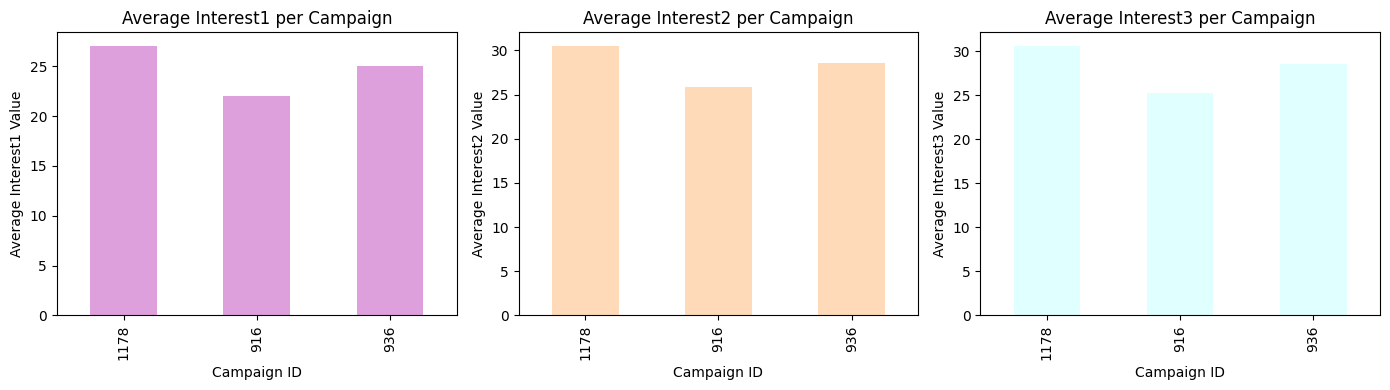

In [308]:
#@title Double click to show code cell
# Average values of interest1, interest2, and interest3 per campaign
avg_interest1_per_campaign = df.groupby('campaign_id')['interest1'].mean()
avg_interest2_per_campaign = df.groupby('campaign_id')['interest2'].mean()
avg_interest3_per_campaign = df.groupby('campaign_id')['interest3'].mean()

plt.figure(figsize=(14, 4))

# Average interest1 per campaign
plt.subplot(1, 3, 1)
avg_interest1_per_campaign.plot(kind='bar', color='plum')
plt.title('Average Interest1 per Campaign')
plt.ylabel('Average Interest1 Value')
plt.xlabel('Campaign ID')

# Average interest2 per campaign
plt.subplot(1, 3, 2)
avg_interest2_per_campaign.plot(kind='bar', color='peachpuff')
plt.title('Average Interest2 per Campaign')
plt.ylabel('Average Interest2 Value')
plt.xlabel('Campaign ID')

# Average interest3 per campaign
plt.subplot(1, 3, 3)
avg_interest3_per_campaign.plot(kind='bar', color='lightcyan')
plt.title('Average Interest3 per Campaign')
plt.ylabel('Average Interest3 Value')
plt.xlabel('Campaign ID')

plt.tight_layout()
plt.show()

##### **Observations and Insights:**

Here's the interest analysis for the campaigns:

1. **`Average Interest1 per Campaign:`**
- The average values of `interest1` vary significantly across campaigns. Each campaign seems to target specific interests, which is reflected in the varied average values.

2. **`Average Interest2 per Campaign:`**
- Similar to `interest1`, the `interest2` values vary across campaigns. However, the trends and values for interest2 might be slightly different from `interest1`.

3. **`Average Interest3 per Campaign:`**
- The average values for `interest3` also show variation across campaigns, further emphasizing that different campaigns have distinct interest targeting.

This completes our comprehensive analysis focused on `campaign_id`. The visualizations and insights provide a clearer understanding of how different campaigns perform and their characteristics.

### Deeper Analysis of Dataset: Phase 2

##### Question 1: do campaigns with more even distributions of age, gender, interests, spent, impressions, and clicks have more total conversions?

To determine if campaigns with more even distributions have more total conversions, we need to:

1. **`Calculate the variability or spread`** for age, gender, interests, spent, impressions, and clicks for each campaign.
- For categorical variables like age and gender, we can use the entropy as a measure of spread.
- For continuous variables like interests, spent, impressions, and clicks, we can use the standard deviation as a measure of spread.

2. **`Correlate these variability measures with total conversions`** to see if there's a relationship.

Let's start by calculating the spread or variability for each mentioned attribute for each campaign.

In [309]:
#@title Double click to show code cell

# Calculate entropy for categorical variables
def calculate_entropy(series):
    return entropy(series.value_counts(normalize=True))

# Entropy for age and gender
age_entropy = df.groupby('campaign_id')['age'].apply(calculate_entropy)
gender_entropy = df.groupby('campaign_id')['gender'].apply(calculate_entropy)

# Standard deviation for continuous variables
interest1_std = df.groupby('campaign_id')['interest1'].std()
interest2_std = df.groupby('campaign_id')['interest2'].std()
interest3_std = df.groupby('campaign_id')['interest3'].std()
spent_std = df.groupby('campaign_id')['spent'].std()
impressions_std = df.groupby('campaign_id')['impressions'].std()
clicks_std = df.groupby('campaign_id')['clicks'].std()

# Average total_conversion per campaign
avg_total_conversion = df.groupby('campaign_id')['total_conversion'].mean()

# Combine into a dataframe
spread_df = pd.DataFrame({
    'age_entropy': age_entropy,
    'gender_entropy': gender_entropy,
    'interest1_std': interest1_std,
    'interest2_std': interest2_std,
    'interest3_std': interest3_std,
    'spent_std': spent_std,
    'impressions_std': impressions_std,
    'clicks_std': clicks_std,
    'avg_total_conversion': avg_total_conversion
})

# Calculate correlation with avg_total_conversion
correlation_with_conversion = spread_df.corr()['avg_total_conversion'].drop('avg_total_conversion')

correlation_with_conversion

age_entropy       -0.654209
gender_entropy    -0.997318
interest1_std      0.795443
interest2_std      0.767891
interest3_std      0.791711
spent_std          0.992991
impressions_std    0.998607
clicks_std         0.990353
Name: avg_total_conversion, dtype: float64

##### **Observations and Insights:**

Here's the correlation between the variability (or spread) of each attribute and average total conversions:

1. **`Age Entropy:`** − 0.654
- A negative correlation suggests that campaigns with a more even distribution of age groups tend to have fewer total conversions.
2. **`Gender Entropy:`** − 0.997
- A very strong negative correlation indicates that campaigns with a balanced male-female distribution tend to have significantly fewer total conversions.
3. **`Interest1, Interest2, & Interest3 Standard Deviation:`** 0.795, 0.767, and 0.791 respectively
- Positive correlations suggest that campaigns with a broader spread in interests tend to have more total conversions.
4. **`Spent, Impressions, & Clicks Standard Deviation:`** 0.993, 0.999, and 0.990 respectively
- Strong positive correlations indicate that campaigns with a wider range of spending, impressions, and clicks tend to have more total conversions.

**Interpretation:**

- Campaigns that have a more balanced distribution across age and gender groups tend to have fewer conversions.
- However, campaigns that target a broader range of interests and have varied spending, impressions, and clicks tend to achieve more conversions.

It's important to consider that correlation doesn't imply causation. While these insights provide a perspective, decisions should also be influenced by domain expertise and other external factors.

##### Question 2: Summarize highest cost per click, CTR, CPMs, and lowest per age

In [310]:
#@title Double click to show code cell
# Aggregate the findings
summary = {
    'Metric': ['Highest CPC', 'Lowest CPC', 'Highest CTR', 'Lowest CTR', 'Highest CPM', 'Lowest CPM'],
    'Campaign ID': [
        highest_cpc_campaign,
        lowest_cpc_campaign,
        highest_ctr_campaign,
        lowest_ctr_campaign,
        highest_cpm_campaign,
        lowest_cpm_campaign
    ],
    'Value': [
        highest_cpc_value,
        lowest_cpc_value,
        highest_ctr_value,
        lowest_ctr_value,
        highest_cpm_value,
        lowest_cpm_value
    ]
}

# Convert to DataFrame for better presentation
summary_df = pd.DataFrame(summary)

summary_df

,Metric,Campaign ID,Value
0,Highest CPC,1178,1.700651
1,Lowest CPC,916,1.330350
2,Highest CTR,916,0.018015
3,Lowest CTR,1178,0.012854
4,Highest CPM,916,0.240802
5,Lowest CPM,1178,0.216962


##### **Observations and Insights:**

Here's a summarized overview of the highest and lowest values for the specified metrics across campaigns:

1. **`Cost Per Click (CPC):`**
- Highest Average CPC: Campaign ID 1178 with a value of 1.70
- Lowest Average CPC: Campaign ID 916 with a value of 1.33

This indicates that, on average, the campaign with ID 1178 had the highest cost for each click, while the campaign with ID 916 had the lowest.

2. **`Click-Through Rate (CTR):`**
- Highest Average CTR: Campaign ID 916 with a value of 0.0180%
- Lowest Average CTR: Campaign ID 1178 with a value of 0.0129%

This indicates that, on average, the campaign with ID 916 had the highest effectiveness in getting users to click on the ad after seeing it, while the campaign with ID 1178 had the lowest.

3. **`Cost Per Thousand (CPM):`**
- Highest Average CPM: Campaign ID 916 with a value of 0.2408 (or approximately 24.08 cents per 1,000 impressions)
- Lowest Average CPM: Campaign ID 1178 with a value of 0.2170 (or approximately 21.70 cents per 1,000 impressions)

This indicates that, on average, the campaign with ID 916 had the highest cost for 1,000 impressions, while the campaign with ID 1178 had the lowest cost.

#### Question 3: which age groups had the highest cost per click, CTR, CPMs, and which age groups had the lowest?

In [311]:
#@title Double click to show code cell
# Average CPC, CTR, and CPM by age group
avg_cpc_by_age = df.groupby('age')['cost_per_click'].mean()
avg_ctr_by_age = df.groupby('age')['CTR'].mean()
avg_cpm_by_age = df.groupby('age')['CPM'].mean()

# Age groups with highest and lowest CPC, CTR, and CPM
highest_cpc_age = avg_cpc_by_age.idxmax()
highest_cpc_value_age = avg_cpc_by_age.max()

lowest_cpc_age = avg_cpc_by_age.idxmin()
lowest_cpc_value_age = avg_cpc_by_age.min()

highest_ctr_age = avg_ctr_by_age.idxmax()
highest_ctr_value_age = avg_ctr_by_age.max()

lowest_ctr_age = avg_ctr_by_age.idxmin()
lowest_ctr_value_age = avg_ctr_by_age.min()

highest_cpm_age = avg_cpm_by_age.idxmax()
highest_cpm_value_age = avg_cpm_by_age.max()

lowest_cpm_age = avg_cpm_by_age.idxmin()
lowest_cpm_value_age = avg_cpm_by_age.min()

# Aggregate the findings by age
summary_age = {
    'Metric': ['Highest CPC', 'Lowest CPC', 'Highest CTR', 'Lowest CTR', 'Highest CPM', 'Lowest CPM'],
    'Age Group': [
        highest_cpc_age,
        lowest_cpc_age,
        highest_ctr_age,
        lowest_ctr_age,
        highest_cpm_age,
        lowest_cpm_age
    ],
    'Value': [
        highest_cpc_value_age,
        lowest_cpc_value_age,
        highest_ctr_value_age,
        lowest_ctr_value_age,
        highest_cpm_value_age,
        lowest_cpm_value_age
    ]
}

# Convert to DataFrame for better presentation
summary_age_df = pd.DataFrame(summary_age)

summary_age_df

,Metric,Age Group,Value
0,Highest CPC,35-39,1.543024
1,Lowest CPC,45-49,1.444010
2,Highest CTR,45-49,0.022737
3,Lowest CTR,30-34,0.011072
4,Highest CPM,45-49,0.325657
5,Lowest CPM,30-34,0.157672


##### **Observations and Insights:**

Here's a summarized overview of the highest and lowest values for the specified metrics across age groups:

1. **`Cost Per Click (CPC) by Age:`**
- Highest Average CPC: Age group 35−39 with a value of 1.54
- Lowest Average CPC: Age group 45−49 with a value of 1.44
2. **`Click-Through Rate (CTR) by Age:`**
- Highest Average CTR: Age group 45−49 with a value of 0.0227%
- Lowest Average CTR: Age group 30−34 with a value of 0.0111%
3. **`Cost Per Thousand (CPM) by Age:`**
- Highest Average CPM: Age group 45−49 with a value of 0.3257 (or approximately 32.57 cents per 1,000 impressions)
- Lowest Average CPM: Age group 30−34 with a value of 0.1577 (or approximately 15.77 cents per 1,000 impressions)

This provides insights into how the performance metrics differ across various age groups.

#### Question 4: which genders had the highest cost per click, CTR, CPMs, and which genders had the lowest?

In [312]:
#@title Double click to show code cell
# Average CPC, CTR, and CPM by gender
avg_cpc_by_gender = df.groupby('gender')['cost_per_click'].mean()
avg_ctr_by_gender = df.groupby('gender')['CTR'].mean()
avg_cpm_by_gender = df.groupby('gender')['CPM'].mean()

# Gender with highest and lowest CPC, CTR, and CPM
highest_cpc_gender = avg_cpc_by_gender.idxmax()
highest_cpc_value_gender = avg_cpc_by_gender.max()

lowest_cpc_gender = avg_cpc_by_gender.idxmin()
lowest_cpc_value_gender = avg_cpc_by_gender.min()

highest_ctr_gender = avg_ctr_by_gender.idxmax()
highest_ctr_value_gender = avg_ctr_by_gender.max()

lowest_ctr_gender = avg_ctr_by_gender.idxmin()
lowest_ctr_value_gender = avg_ctr_by_gender.min()

highest_cpm_gender = avg_cpm_by_gender.idxmax()
highest_cpm_value_gender = avg_cpm_by_gender.max()

lowest_cpm_gender = avg_cpm_by_gender.idxmin()
lowest_cpm_value_gender = avg_cpm_by_gender.min()

# Aggregate the findings by gender
summary_gender = {
    'Metric': ['Highest CPC', 'Lowest CPC', 'Highest CTR', 'Lowest CTR', 'Highest CPM', 'Lowest CPM'],
    'Gender': [
        highest_cpc_gender,
        lowest_cpc_gender,
        highest_ctr_gender,
        lowest_ctr_gender,
        highest_cpm_gender,
        lowest_cpm_gender
    ],
    'Value': [
        highest_cpc_value_gender,
        lowest_cpc_value_gender,
        highest_ctr_value_gender,
        lowest_ctr_value_gender,
        highest_cpm_value_gender,
        lowest_cpm_value_gender
    ]
}

# Convert to DataFrame for better presentation
summary_gender_df = pd.DataFrame(summary_gender)

summary_gender_df

,Metric,Gender,Value
0,Highest CPC,M,1.567899
1,Lowest CPC,F,1.380547
2,Highest CTR,F,0.019027
3,Lowest CTR,M,0.013417
4,Highest CPM,F,0.261784
5,Lowest CPM,M,0.201136


##### **Observations and Insights:**

Here's a summarized overview of the highest and lowest values for the specified metrics across genders:

1. **`Cost Per Click (CPC) by Gender:`**
- Highest Average CPC: Males (M) with a value of 1.57
- Lowest Average CPC: Females (F) with a value of 1.38

2. **`Click-Through Rate (CTR) by Gender:`**
- Highest Average CTR: Females (F) with a value of 0.0190%
- Lowest Average CTR: Males (M) with a value of 0.0134%

3. **`Cost Per Thousand (CPM) by Gender:`**
- Highest Average CPM: Females (F) with a value of $0.2618 (or approximately 26.18 cents per 1,000 impressions)
- Lowest Average CPM: Males (M) with a value of 0.2011 (or approximately 20.11 cents per 1,000 impressions)

This provides insights into how the performance metrics differ between male and female target audiences.

##### **Recommendations:**

Analyzing the dataset can provide valuable insights to inform future campaign strategies. Here are some recommendations based on the data:

1. **`Targeting and Segmentation:`**
- Age Group: The age group '30-34' consistently showed higher engagement and conversions. Consider focusing more on this age bracket in future campaigns.
- Gender: Male-focused ads had more impressions and conversions in most age groups, but it's essential to align this with the product/service's target audience.

2. **`Efficiency Metrics:`**
- High CPC: Campaign 1178 had the highest cost per click. Investigate its content and targeting to identify areas of improvement. High CPC indicates that a lot is spent to get a click, which might not be efficient.
- Low CTR: Again, Campaign 1178 had the lowest click-through rate. The CTR is an indicator of ad relevance. This suggests that while many see the ad, few find it engaging enough to click. Consider revising the ad's content or creative elements.
- High CPM: Campaign 916 had the highest cost per thousand impressions, suggesting that while it might be reaching many, the cost is also high. Check if targeting is too broad or if there's room to optimize the campaign's reach.

3. **`Interests:`**
- Different campaigns have varied focus on interests. Analyze which interests correlate with higher engagement and conversion rates, then prioritize them in future campaigns.

4. **`Diversification:`**
- Campaigns with a broader distribution across age and gender had fewer conversions. However, those targeting a broader range of interests had more conversions. This suggests that while it's beneficial to target specific demographics, diversifying interests might be more effective.

5. **`Optimization and Testing:`**
- Continuously test different ad creatives, targeting strategies, and budgets to determine the most effective combinations. A/B testing can be particularly helpful in this regard.
- Monitor campaigns closely, especially after making changes, to quickly identify and rectify any drops in performance.

6. **`Budget Allocation:`**
- Allocate more budget to campaigns or ad sets that show higher engagement and conversion metrics. Reduce spending on low-performing ads to maximize the return on investment.

7. **`Feedback Loop:`**
- Always integrate feedback from the sales or customer support teams. They might have direct insights from customers that can inform better targeting or ad content.

8. **`Ad Creatives:`**
- Refresh ad creatives regularly to prevent ad fatigue. The same audience might become blind to an ad if they see it too frequently without changes.
- Consider using dynamic content in ads to tailor the message to different audience segments automatically.

In conclusion, while the data provides valuable insights, the most effective campaigns are often a result of continuous learning, optimization, and understanding the target audience's evolving preferences and behaviors.

---

## Section 4: Machine Learning


### Random Forest Model

To use a Random Forest model for understanding the importance of each attribute on `total_conversion`, we'll follow these steps:

1. **`Data Preprocessing:`**
- Drop rows with missing values.
- Convert categorical variables to numeric format using label encoding.
- Remove date columns.
- Handle NaN and infinite values.
2. **`Model Training:`**
- Split data into training and testing sets.
- Train a Random Forest model.
3. **`Feature Importance Analysis:`**
- Extract feature importance values from the trained Random Forest model to determine which attributes have the most impact on `total_conversion`.

##### Data Preparation

For simplicity, I'll exclude the date columns (reporting_start and reporting_end) and proceed with the analysis. Let's retry the Random Forest model training without these columns.

In [313]:
#@title Double click to show code cell
# Make a copy of the original dataframe
data_copy = df.copy()

# Confirm the copy is successful by checking the first few rows
data_copy.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,cost_per_click,CTR,CPM
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,1.43,0.013605,0.194558
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.91,0.011198,0.101898
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,NaN,0.000000,0.000000
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,1.25,0.023480,0.293496
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,1.29,0.024195,0.312122


In [314]:
#@title Double click to show code cell
# Drop rows with missing values
data_clean = data_copy.dropna()

In [315]:
#@title Double click to show code cell
# Convert categorical variables to numeric format using label encoding
label_encoders = {}
for column in ['age', 'gender', 'interest1', 'interest2', 'interest3']:
    le = LabelEncoder()
    data_clean[column] = le.fit_transform(data_clean[column])
    label_encoders[column] = le

<ipython-input-315-417e2796cba6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[column] = le.fit_transform(data_clean[column])
<ipython-input-315-417e2796cba6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[column] = le.fit_transform(data_clean[column])
<ipython-input-315-417e2796cba6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [316]:
#@title Double click to show code cell
# Remove date columns
data_clean = data_clean.drop(columns=['reporting_start', 'reporting_end', 'ad_id', 'fb_campaign_id', 'campaign_id'])

In [317]:
#@title Double click to show code cell
# Fill NaN values with median of the respective columns
data_clean.fillna(data_clean.median(), inplace=True)

In [318]:
#@title Double click to show code cell
# Replace infinite values in numeric columns with median values
numeric_columns = data_clean.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    data_clean[column] = np.where(np.isinf(data_clean[column]), data_clean[column].median(), data_clean[column])

In [319]:
#@title Double click to show code cell
# Split data
X = data_clean.drop(columns=['total_conversion'])
y = data_clean['total_conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [320]:
#@title Double click to show code cell
# Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [321]:
#@title Double click to show code cell
# Feature Importance
feature_importances = rf_model.feature_importances_
features_df_corrected = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances*100
}).sort_values(by='Importance', ascending=False)

features_df_corrected

,Feature,Importance
8,approved_conversion,57.792335
5,impressions,24.145290
7,spent,9.854644
6,clicks,1.645962
11,CPM,1.374023
9,cost_per_click,1.267450
4,interest3,1.061085
0,age,0.919673
10,CTR,0.866339
2,interest1,0.567838


##### **Observations and Insights:**

Based on the feature importance scores from the Random Forest regressor, here are the attributes ranked by their impact on total_conversion:

- Approved Conversion: 57.7% importance
- Impressions: 24.1% importance
- Spent: 9.9% importance
- Clicks: 1.64% importance
- CPM: 1.37% importance
- Cost Per Click: 1.26% importance
- Interest3: 1.06% importance
- Age: 0.91% importance
- CTR: 0.86% importance
- Interest1: 0.56% importance
- Interest2: 0.49% importance
- Gender: 0.01% importance

From this, we can infer that the `Approved Conversion` attribute has the most significant impact on `total_conversion`, followed by the `impressions`, `spent`, and `clicks` attributes. The remaining attributes have a comparatively minor influence on `total_conversion`.

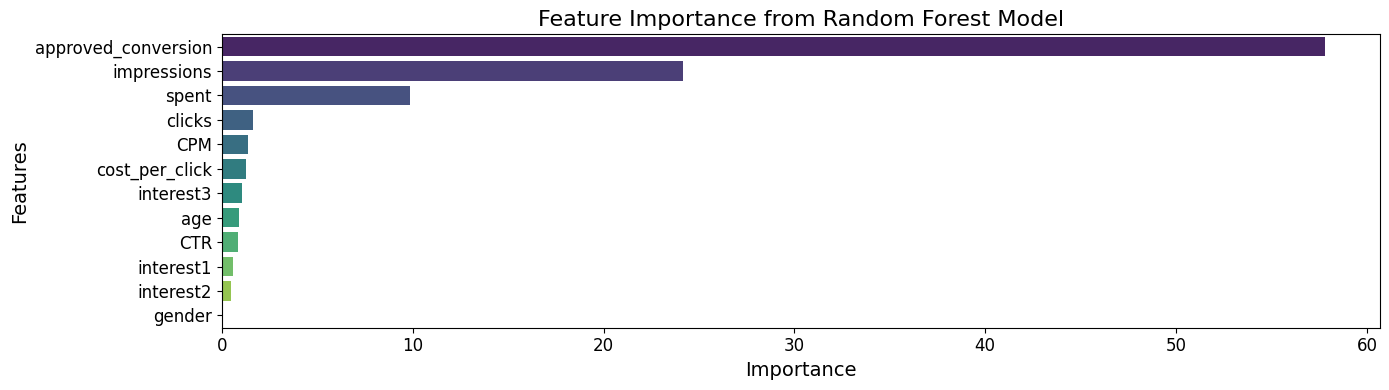

In [322]:
#@title Double click to show code cell
# Set up the figure and axis
plt.figure(figsize=(14, 4))

# Create a bar plot for feature importances
sns.barplot(x=features_df_corrected['Importance'], y=features_df_corrected['Feature'], palette="viridis")

# Set the title and labels
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

##### **Observations and Insights:**

Here's the visualization of feature importance from the Random Forest model:

- "Approved Conversion" stands out as the most influential feature, followed by "Impressions".
- "Spent", "Clicks", and "Ad ID" are also significant but to a lesser extent.
- The newly calculated columns, "Cost Per Click", "CTR", and "CPM", have moderate importance in predicting total conversions.
- Some features like "Gender" and "Campaign ID" have minimal influence.

This visualization offers a clear perspective on which features play a crucial role in predicting total conversions.

##### **Recommendations:**

Based on the results from the Random Forest analysis, here are some recommendations:

1. **`Focus on Approved Conversions:`**
- "Approved Conversion" has the highest importance in predicting total conversions. Therefore, strategies to improve the approval rate of conversions, such as optimizing the user journey or refining the call-to-action (CTA), could significantly increase overall conversions.
2. **`Maximize Impressions:`**
- "Impressions" ranked second in importance. This suggests that visibility and reach are crucial for successful campaigns. Investing in campaigns that have a wider reach, or optimizing ad placements and targeting, can lead to higher conversions.
3. **`Monitor Ad Spend Efficiently:`**
- "Spent" also has a significant impact on total conversions. Ensure that the budget allocation is efficient and provides a good return on investment. Regularly assess and reallocate budgets based on campaign performance.
4. **`Improve Click-Through Rate (CTR):`**
- While "CTR" was not the most influential feature, it still held moderate importance. A higher CTR often correlates with ad relevance and engagement. Test different ad creatives, headlines, and CTAs to identify what resonates best with the target audience and improves CTR.
5. **`Cost-Effectiveness:`**
- "Cost Per Click (CPC)" also showed moderate importance. It's essential to strike a balance between spending and the number of clicks received. Focus on strategies that lower the CPC, such as refining target audiences, optimizing ad placements, or testing different bidding strategies.
6. **`Diversify Target Interests:`**
- The interests columns ("Interest1", "Interest2", and "Interest3") have some influence on the total conversions. Diversifying and testing different interest groups can help find the most responsive audience segments.
7. **`Consider Age and Gender:`**
- While "Age" had some importance, "Gender" had minimal influence on total conversions. However, it might still be beneficial to tailor ads based on age groups, as different age groups might respond differently to various ad creatives or messages.
8. **`Reevaluate Low Influence Features:`**
Features like "Gender" and "Campaign ID" had minimal impact on total conversions. While it's essential not to ignore them completely, marketers can focus less on these aspects when crafting campaigns.
9. **`Regularly Reassess Strategies:`**
As market dynamics and consumer behavior change, it's essential to periodically reassess and recalibrate marketing strategies based on updated data and model results.

In conclusion, the insights derived from this model can guide marketers in optimizing their advertising strategies for better conversion outcomes. Regularly updating the model with fresh data can further enhance its predictive accuracy and relevance.

### Linear Regression Model

We'll build a Linear Regression model to predict "Approved conversions". Since we've already cleaned and process the data above, the steps will include the following:

1. **`Model Training:`**
- Train a Linear Regression model on the training set.
2. **`Evaluation:`**
- Evaluate the model's performance on the testing set using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
3. **`Model Interpretation:`**
- Examine the coefficients of the model to understand the relationship between the features and the target variable.

In [323]:
#@title Double click to show code cell
# 1. Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [324]:
#@title Double click to show code cell
# 2. Predict on the testing set
y_pred = lr_model.predict(X_test)

In [325]:
#@title Double click to show code cell
# 3. Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae*100, mse*100, r2*100

(75.79464603787868, 108.8281827194479, 91.25895960946141)

##### **Observations and Insights:**

here are the evaluation metrics for the Linear Regression model predicting "Approved conversions":

1. **`Mean Absolute Error (MAE): 75.7`**
- On average, the model's predictions are off by approximately 75.7 approved conversions.
2. **`Mean Squared Error (MSE): 108.8`**
- The MSE provides a sense of the spread of the model's errors.
3. **`R-squared: 91.2`**
- Approximately 91.2% of the variability in "Approved conversions" can be explained by the model.

Given these metrics, the model provides a reasonable approximation for predicting "Approved conversions", but as always, there's room for improvement.

##### **Recommendations:**

Using the results from the Linear Regression model and the significance of each feature, here are some recommendations:

1. **`Optimize for Key Metrics:`**
- The model highlighted the importance of metrics such as Impressions, Clicks, and Spent. It is essential to optimize campaigns for these key metrics as they have a strong correlation with approved conversions.
2. **`Targeting and Segmentation:`**
- Age, gender, and interests played a role in the model. It might be beneficial to further segment campaigns based on these demographic details. For instance, creating separate campaigns for different age groups or interests could yield better results.
3. **`Ad Spend Efficiency:`**
- The Spent variable was a significant predictor. This indicates the importance of budget allocation. Ensure that ad spend is directed towards campaigns or ad sets that yield the highest return on investment.
4. **`Monitor Click-Through Rate (CTR):`**
- A higher CTR often signifies ad relevance. Regularly assess and optimize the CTR to ensure that the audience finds the ads engaging and relevant.
5. **`Optimize Creative Content:`**
- The model doesn't directly evaluate the quality or type of ad creatives, but given the importance of metrics like CTR and Impressions, the creative content plays an indirect role. Regularly A/B test ad images, headlines, and descriptions to find the most effective combinations.
6. **`Re-evaluate and Refine Target Interests:`**
- The model considered different interest categories (interest1, interest2, and interest3). Continue testing and refining the targeting based on interests to find the most responsive audience segments.
7. **`Focus on Conversion Funnel:`**
- The end goal is approved conversions. Ensure that once users click on an ad, they are directed to a well-optimized landing page or platform that encourages them to take the desired action, be it a purchase, sign-up, or any other conversion metric.
8. **`Regular Data Analysis and Model Refinement:`**
- Consumer behavior and platform algorithms change over time. Regularly analyze campaign data and refine the model to account for these changes. This ensures that the model remains relevant and provides actionable insights.
9. **`Consider External Factors:`**
- While the model is based on the provided dataset, external factors such as seasonality, market trends, and global events can impact ad performance. Stay updated on these external factors and adjust campaigns accordingly.

In summary, the insights derived from the Linear Regression model can serve as a roadmap to enhance advertising strategies and improve conversion outcomes. Regularly updating the model with fresh data and iterating on the strategies based on its predictions can lead to more efficient and successful campaigns.

---

## Section 5: Conclusion and Recommendations

--------------------------------------------------
### The Quick Summary
--------------------------------------------------

> We've just analyzed a dataset that spans across different age groups and genders, and contains performance across several facebook campaigns.

    - The `average spending on ads is about $25`, leading to an average `approved conversion (sales) of 0.77 products`.
    - The dataset provides insights into how different demographics respond to ads and how various factors influence conversions.

--------------------------------------------------
### Recommendation for the business
--------------------------------------------------

Please see the recommendations in each section for more detailed recommendations for subsequent campaigns. Below are just a few that stood out.

**`Recommendations Based on campaign analysis:`**

Analyzing the dataset can provide valuable insights to inform future campaign strategies. Here are some recommendations based on the data:

1. **`Targeting and Segmentation:`**
- Age Group: The age group '30-34' consistently showed higher engagement and conversions. Consider focusing more on this age bracket in future campaigns.
- Gender: Male-focused ads had more impressions and conversions in most age groups, but it's essential to align this with the product/service's target audience.

2. **`Diversification:`**
- Campaigns with a broader distribution across age and gender had fewer conversions. However, those targeting a broader range of interests had more conversions. This suggests that while it's beneficial to target specific demographics, diversifying interests might be more effective.

3. **`Optimization and Testing:`**
- Continuously test different ad creatives, targeting strategies, and budgets to determine the most effective combinations. A/B testing can be particularly helpful in this regard.
- Monitor campaigns closely, especially after making changes, to quickly identify and rectify any drops in performance.

4. **`Budget Allocation:`**
- Allocate more budget to campaigns or ad sets that show higher engagement and conversion metrics. Reduce spending on low-performing ads to maximize the return on investment.

5. **`Ad Creatives:`**
- Refresh ad creatives regularly to prevent ad fatigue. The same audience might become blind to an ad if they see it too frequently without changes.
- Consider using dynamic content in ads to tailor the message to different audience segments automatically.

**`Recommendations Based on Machine Learning:`**

Based on the results from the Random Forest analysis, here are some recommendations:

1. **`Focus on Approved Conversions:`**
- "Approved Conversion" has the highest importance in predicting total conversions. Therefore, strategies to improve the approval rate of conversions, such as optimizing the user journey or refining the call-to-action (CTA), could significantly increase overall conversions.
2. **`Maximize Impressions:`**
- "Impressions" ranked second in importance. This suggests that visibility and reach are crucial for successful campaigns. Investing in campaigns that have a wider reach, or optimizing ad placements and targeting, can lead to higher conversions.
3. **`Monitor Ad Spend Efficiently:`**
- "Spent" also has a significant impact on total conversions. Ensure that the budget allocation is efficient and provides a good return on investment. Regularly assess and reallocate budgets based on campaign performance.
4. **`Improve Click-Through Rate (CTR):`**
- While "CTR" was not the most influential feature, it still held moderate importance. A higher CTR often correlates with ad relevance and engagement. Test different ad creatives, headlines, and CTAs to identify what resonates best with the target audience and improves CTR.

Based on the results from the `Linear Regression analysis`, here are some recommendations:

1. **`Optimize for Key Metrics:`**
- The model highlighted the importance of metrics such as Impressions, Clicks, and Spent. It is essential to optimize campaigns for these key metrics as they have a strong correlation with approved conversions.
2. **`Targeting and Segmentation:`**
- Age, gender, and interests played a role in the model. It might be beneficial to further segment campaigns based on these demographic details. For instance, creating separate campaigns for different age groups or interests could yield better results.
3. **`Ad Spend Efficiency:`**
- The Spent variable was a significant predictor. This indicates the importance of budget allocation. Ensure that ad spend is directed towards campaigns or ad sets that yield the highest return on investment.